In [1]:
# -*- coding: UTF-8 -*-
from sklearn.model_selection import train_test_split
from tensorflow import keras

import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import pandas

In [2]:
def readX(path, lines):
	X = pandas.read_json(path, lines = lines)
	X = X.astype({"Country":'float', "City":'float', "Institution": 'float'}) 
	return X

In [3]:
Y = pandas.read_json("..\\jsons\\main_Y.json", lines = True)
Y['connected'] = Y['connected'].astype(float)
X = readX("..\\jsons\\main_X.json", True)
X.head()


,Country,City,Institution,hIndex,Citations,Documents,jaccardCoef,Areas
0,1.0,1.0,1.0,0.50000,0.08182,0.25000,0.04348,0.33333
1,0.0,0.0,0.0,0.20000,0.06478,0.16438,0.02128,0.35714
2,1.0,0.0,0.0,0.21053,0.10358,0.15584,0.08451,0.50000
3,0.0,0.0,0.0,0.36364,0.23207,0.19355,0.06250,0.44444
4,1.0,0.0,0.0,0.63333,0.53180,0.96104,0.05085,0.55556


In [4]:
model1 = keras.Sequential([
	keras.Input(shape = (7)),
	keras.layers.Dense(16, activation='relu'),
	keras.layers.Dense(8, activation='relu'),
	keras.layers.Dense(4, activation='relu'),
	keras.layers.Dense(1, activation='sigmoid')
])

weights1 = model1.get_weights()

model1.compile(optimizer='adam',
	loss = keras.losses.BinaryCrossentropy(),
	metrics = [keras.metrics.BinaryAccuracy(name='accuracy', threshold=0.5)])

model1.build()
#model1.summary()

In [5]:
collsX = list(X.columns)
attribute_list = collsX.copy()

res1 = dict()

for attribute in tqdm(collsX):
	attribute_list.remove(attribute)
	newX = X[attribute_list]
	# print(attribute)
	# print(newX.head())
	# break

	X_train, X_val, Y_train, Y_val = train_test_split(newX, Y, test_size=0.2, random_state=42)

	model1.set_weights(weights1)
	history = model1.fit(X_train.to_numpy(), Y_train.to_numpy(), epochs=500, batch_size=64, shuffle = True, validation_data = (X_val.to_numpy(), Y_val.to_numpy()), verbose=0)

	res1[attribute] = history
	attribute_list.append(attribute)

100%|██████████| 8/8 [02:00<00:00, 15.08s/it]


In [6]:
model2 = keras.Sequential([
	keras.Input(shape = (6)),
	keras.layers.Dense(16, activation='relu'),
	keras.layers.Dense(8, activation='relu'),
	keras.layers.Dense(4, activation='relu'),
	keras.layers.Dense(1, activation='sigmoid')
])

weights2 = model2.get_weights()

model2.compile(optimizer='adam',
	loss = keras.losses.BinaryCrossentropy(),
	metrics = [keras.metrics.BinaryAccuracy(name='accuracy', threshold=0.5)])

model2.build()
#model2.summary()

In [11]:
collsX = list(X.columns)
collsX.remove("Areas")
attribute_list = collsX.copy()

res2 = dict()

for attribute in tqdm(collsX):
	attribute_list.remove(attribute)
	newX = X[attribute_list]

	X_train, X_val, Y_train, Y_val = train_test_split(newX, Y, test_size=0.2, random_state=42)

	model2.set_weights(weights2)
	history = model2.fit(X_train.to_numpy(), Y_train.to_numpy(), epochs=500, batch_size=64, shuffle = True, validation_data = (X_val.to_numpy(), Y_val.to_numpy()), verbose=0)

	res2[attribute] = history
	attribute_list.append(attribute)

100%|██████████| 7/7 [01:36<00:00, 13.73s/it]


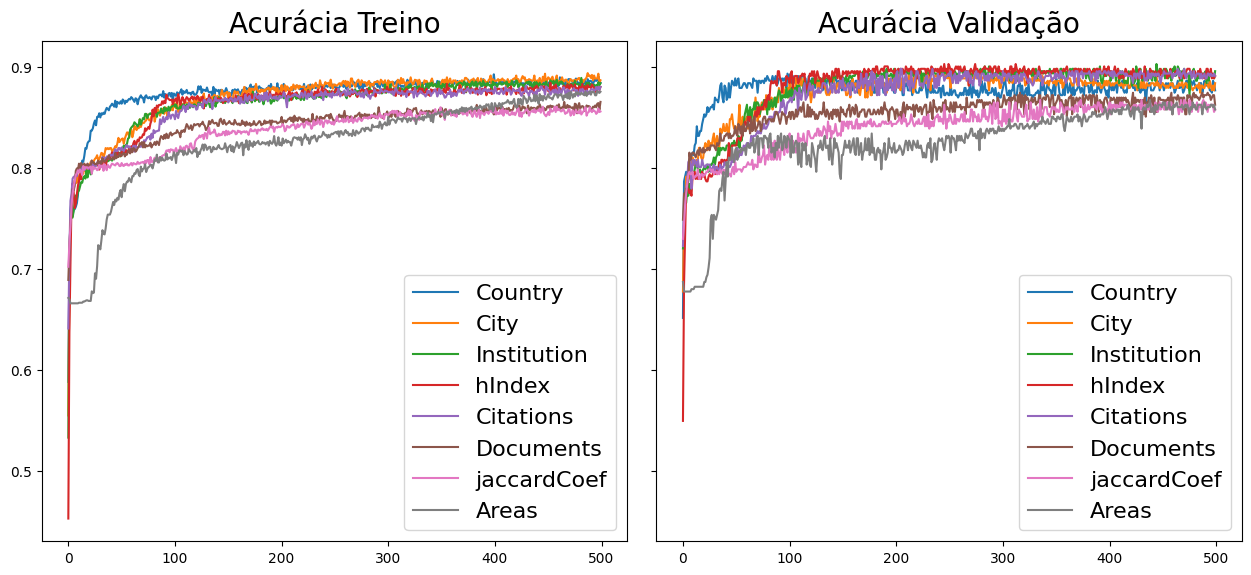

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)
for k, v in res1.items():
	ax[0].plot(v.history["accuracy"], label = k)
	ax[1].plot(v.history["val_accuracy"], label = k)
ax[0].set_title("Acurácia Treino", size = 20)
ax[1].set_title("Acurácia Validação", size = 20)

plt.subplots_adjust(left=0, right=1,
                    bottom=0, top=1,
                    wspace=0.05, hspace=0.1)

# plt.tight_layout()
ax[0].legend(prop={'size': 16})
ax[1].legend(prop={'size': 16})
plt.show()


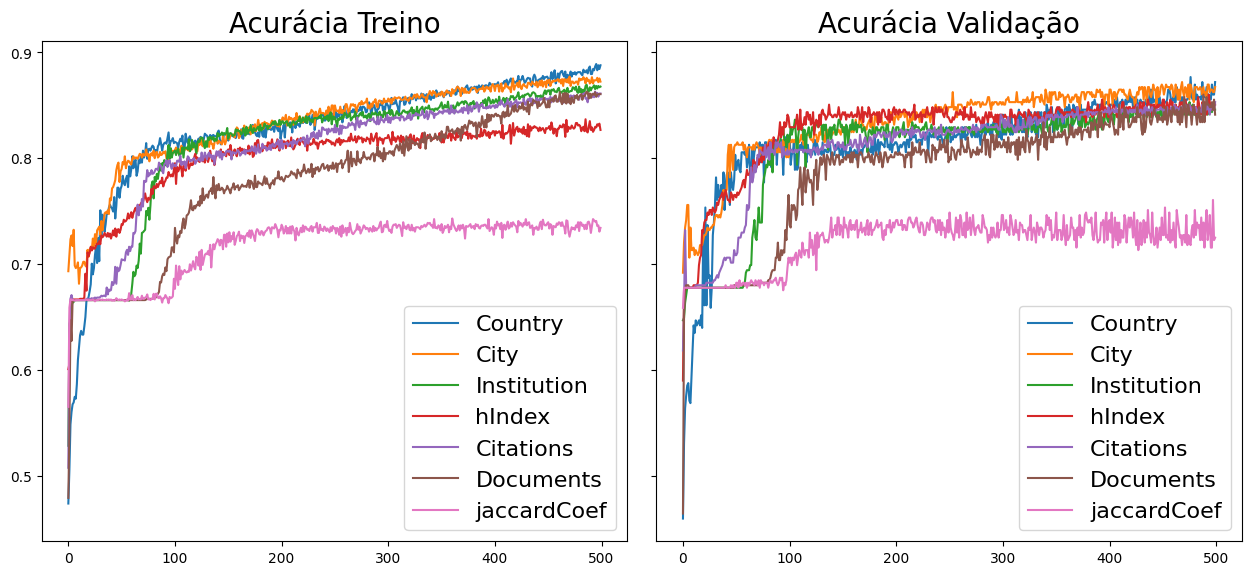

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)
for k, v in res2.items():
	ax[0].plot(v.history["accuracy"], label = k)
	ax[1].plot(v.history["val_accuracy"], label = k)
ax[0].set_title("Acurácia Treino", size = 20)
ax[1].set_title("Acurácia Validação", size = 20)

plt.subplots_adjust(left=0, right=1,
                    bottom=0, top=1,
                    wspace=0.05, hspace=0.1)

# plt.tight_layout()
ax[0].legend(prop={'size': 16})
ax[1].legend(prop={'size': 16})
plt.show()


In [14]:
from sklearn.metrics import classification_report
import random
import os
os.environ['PYTHONHASHSEED'] = str(42)
np.random.seed(42)
random.seed(42)

collsX = list(X.columns)
collsX.remove("jaccardCoef")
X_train, X_val, Y_train, Y_val = train_test_split(X[collsX], Y, test_size=0.2, random_state=42)
model1.set_weights(weights1)
model1.fit(X_train.to_numpy(), Y_train.to_numpy(), epochs=500, batch_size=64, shuffle = True, verbose=0)
y_jacc = model1.predict(X_val, verbose=0)
y_jacc_bool = y_jacc > 0.5


collsX = list(X.columns)
collsX.remove("Areas")
X_train, X_val, Y_train, Y_val = train_test_split(X[collsX], Y, test_size=0.2, random_state=42)
model1.set_weights(weights1)
model1.fit(X_train.to_numpy(), Y_train.to_numpy(), epochs=500, batch_size=64, shuffle = True, verbose=0)
y_area = model1.predict(X_val, verbose=0)
y_area_bool = y_area > 0.5

collsX.remove("jaccardCoef")
X_train, X_val, Y_train, Y_val = train_test_split(X[collsX], Y, test_size=0.2, random_state=42)
model2.set_weights(weights2)
model2.fit(X_train.to_numpy(), Y_train.to_numpy(), epochs=500, batch_size=64, shuffle = True, verbose=0)
y_area_jacc = model2.predict(X_val, verbose=0)
y_area_jacc_bool = y_area_jacc > 0.5


print("JACC")
print(classification_report(Y_val, y_jacc_bool, digits=3))
print("AREA")
print(classification_report(Y_val, y_area_bool, digits=3))
print("AREA e JACC")
print(classification_report(Y_val, y_area_jacc_bool, digits=3),end="")


JACC
              precision    recall  f1-score   support

         0.0      0.873     0.873     0.873       212
         1.0      0.871     0.871     0.871       210

    accuracy                          0.872       422
   macro avg      0.872     0.872     0.872       422
weighted avg      0.872     0.872     0.872       422

AREA
              precision    recall  f1-score   support

         0.0      0.888     0.825     0.856       212
         1.0      0.836     0.895     0.864       210

    accuracy                          0.860       422
   macro avg      0.862     0.860     0.860       422
weighted avg      0.862     0.860     0.860       422

AREA e JACC
              precision    recall  f1-score   support

         0.0      0.709     0.792     0.748       212
         1.0      0.762     0.671     0.714       210

    accuracy                          0.732       422
   macro avg      0.736     0.732     0.731       422
weighted avg      0.735     0.732     0.731       42